In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Define function to process data
def process_data(filename, keyword, plot_name, title, exclude):
    # Load the data
    data = pd.read_csv(filename, on_bad_lines='skip')

    # Convert the 'Author Keywords' to lowercase for uniformity
    data['Author Keywords'] = data['Author Keywords'].str.lower()
    
    
    # Exclude any publication made in the exclude_year
    data = data[data['Publication Year'] != 2023]

    # Filter rows containing the keyword
    data_filtered = data[data['Author Keywords'].str.contains(keyword, na=False)]
    data['Publication Year'] = data['Publication Year'].astype(int)


    # Group by 'Publication Year' and count the number of publications
    counts = data_filtered['Publication Year'].value_counts().sort_index()

    # Split the 'Author Keywords' column by semicolon
    keywords = data_filtered['Author Keywords'].str.split(';')

    # Flatten the list of lists to get a single list of keywords
    keywords = [item.strip() for sublist in keywords for item in sublist]

    # Convert to a DataFrame
    keywords_df = pd.DataFrame(keywords, columns=['Keyword'])

    # Count the occurrences of each keyword
    keyword_counts = keywords_df['Keyword'].value_counts()

    # Exclude the given phrase
    keyword_counts = keyword_counts[keyword_counts.index != exclude]

    return counts, keyword_counts







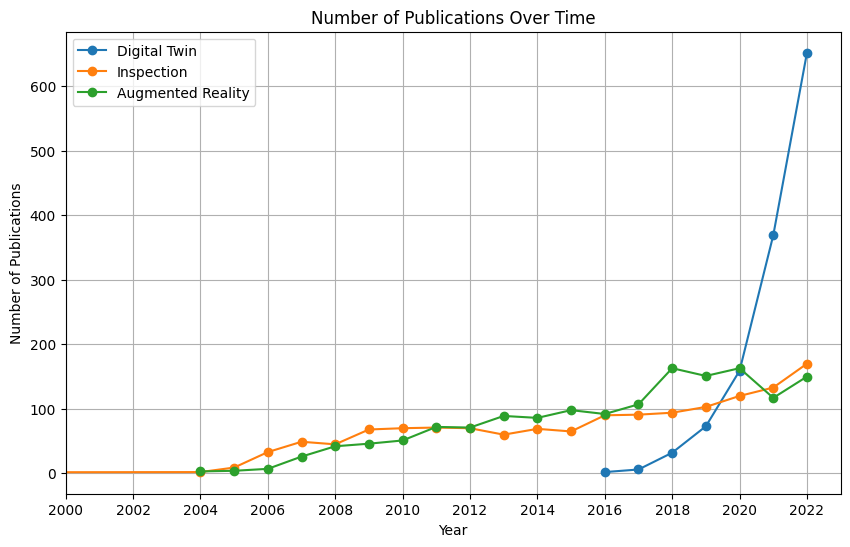

In [140]:
# Process the three files
counts_dt, keyword_counts_dt = process_data('CSV/DT.csv', 'digital twin', 'DT', 'Digital Twin', 'digital twin')
counts_inspection, keyword_counts_inspection = process_data('CSV/Inspection.csv', 'inspection', 'Inspection', 'Inspection', 'inspection')
counts_ar, keyword_counts_ar = process_data('CSV/AR.csv', 'augmented reality', 'AR', 'Augmented Reality', 'augmented reality')


# Plot the counts
plt.figure(figsize=(10, 6))
plt.plot(counts_dt.index, counts_dt.values, marker='o', label='Digital Twin')
plt.plot(counts_inspection.index, counts_inspection.values, marker='o', label='Inspection')
plt.plot(counts_ar.index, counts_ar.values, marker='o', label='Augmented Reality')
plt.title('Number of Publications Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.grid(True)
plt.legend()


# Set the range of the x-axis
plt.xlim(2000, 2023)

# Manually set x-ticks every 2 years from 2000 to 2022
plt.xticks(np.arange(2000, 2023, 2))
plt.savefig('Plots/Publications.png')
plt.savefig(r'..\MSc_HoloLens_Jackal_2391076\Reportfiles\figures\WordSearch\Publications.png')
plt.show()







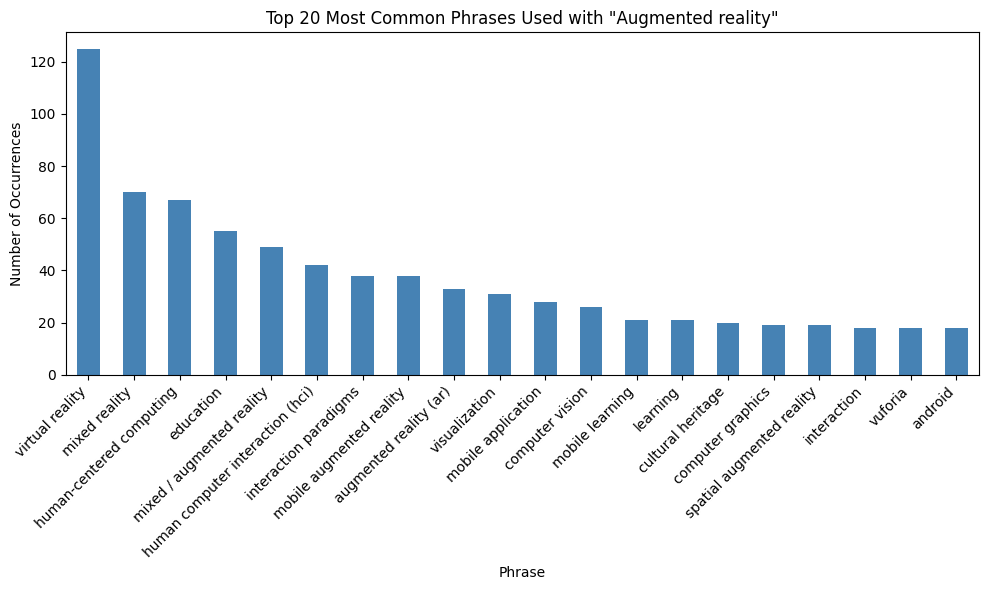

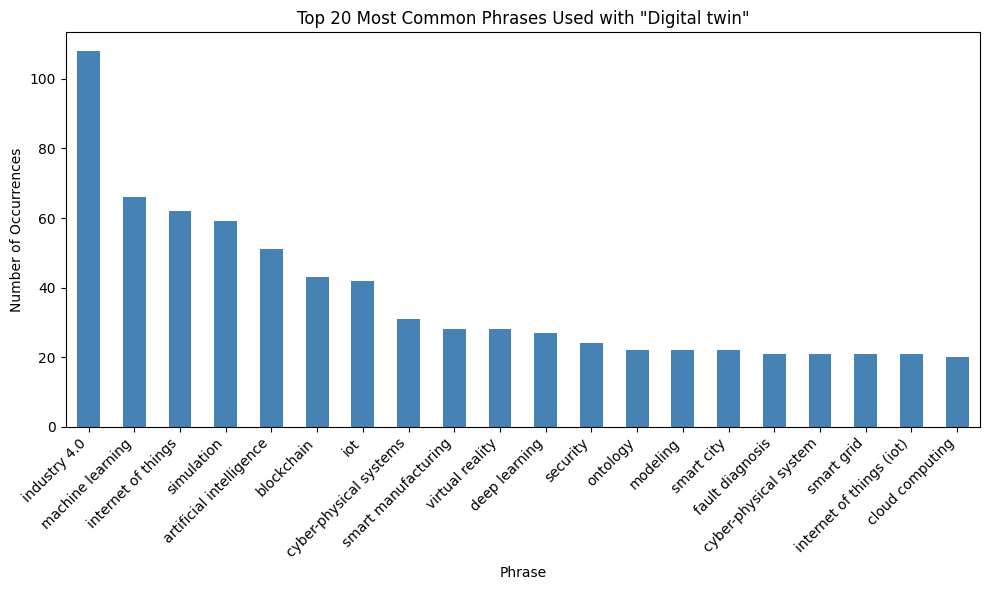

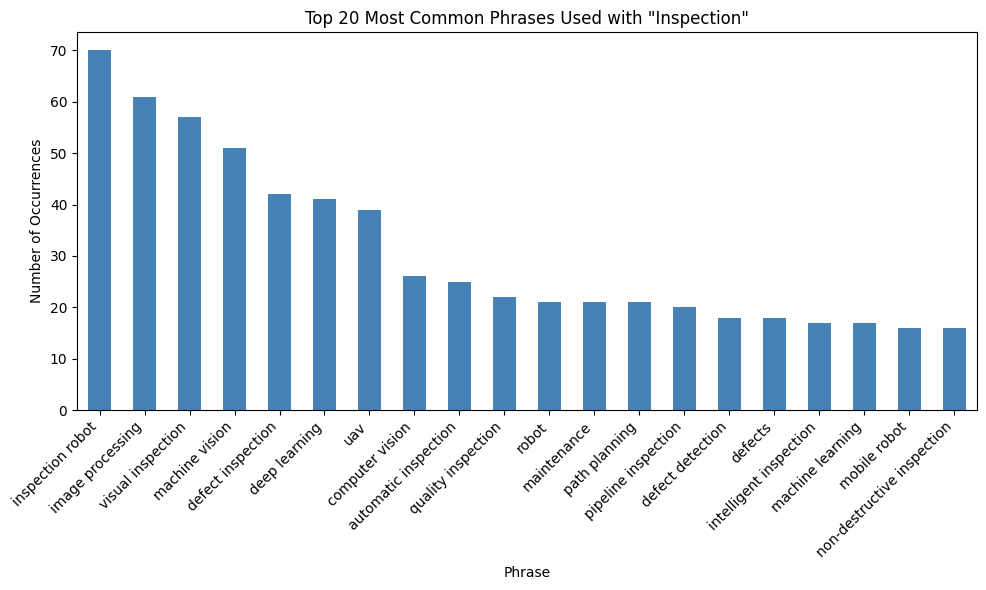

In [141]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_top_phrases(file, keyword, exclude_phrase, plot_name):
    # Load the data
    data = pd.read_csv(file, on_bad_lines='skip')

    # Convert the 'Author Keywords' to lowercase for uniformity
    data['Author Keywords'] = data['Author Keywords'].str.lower()

    # Filter rows containing the keyword
    data_filtered = data[data['Author Keywords'].str.contains(keyword, na=False)]

    # Split the 'Author Keywords' column by semicolon
    keywords = data_filtered['Author Keywords'].str.split(';')

    # Flatten the list of lists to get a single list of keywords
    keywords = [item.strip() for sublist in keywords for item in sublist]

    # Convert to a DataFrame
    keywords_df = pd.DataFrame(keywords, columns=['Keyword'])

    # Count the occurrences of each keyword
    keyword_counts = keywords_df['Keyword'].value_counts()

    # Exclude the phrase
    for exclude in exclude_phrase:
        keyword_counts = keyword_counts[keyword_counts.index != exclude]

    # Get the top 20 most common phrases
    top_phrases = keyword_counts.head(20)

    # Plot the top 20 most common phrases
    plt.figure(figsize=(10, 6))
    top_phrases.plot(kind='bar', color='steelblue')
    plt.title(f'Top 20 Most Common Phrases Used with "{keyword.capitalize()}"')
    plt.xlabel('Phrase')
    plt.ylabel('Number of Occurrences')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'Plots/Phrases/{plot_name}.png')
    plt.savefig(fr'..\MSc_HoloLens_Jackal_2391076\Reportfiles\figures\WordSearch\Phrases\{plot_name}.png')

# Define the file paths and corresponding keywords
files = ['CSV/AR.csv', 'CSV/DT.csv', 'CSV/Inspection.csv']
keywords = ['augmented reality', 'digital twin', 'inspection']
exclude_phrases = [['augmented reality'], ['digital twin','digital twins','digital twin (dt)'], ['inspection']]
plot_names = ['AR_Phrases', 'DT_Phrases', 'IN_Phrases']

# Plot the bar charts for each CSV file
for file, keyword, exclude_phrase, plot_name in zip(files, keywords, exclude_phrases, plot_names):
    plot_top_phrases(file, keyword, exclude_phrase, plot_name)


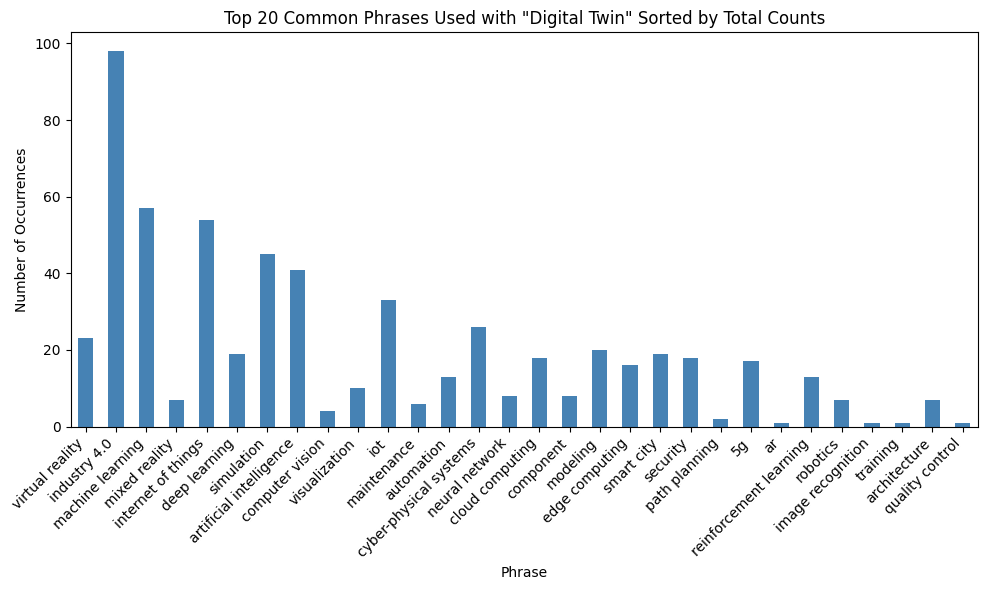

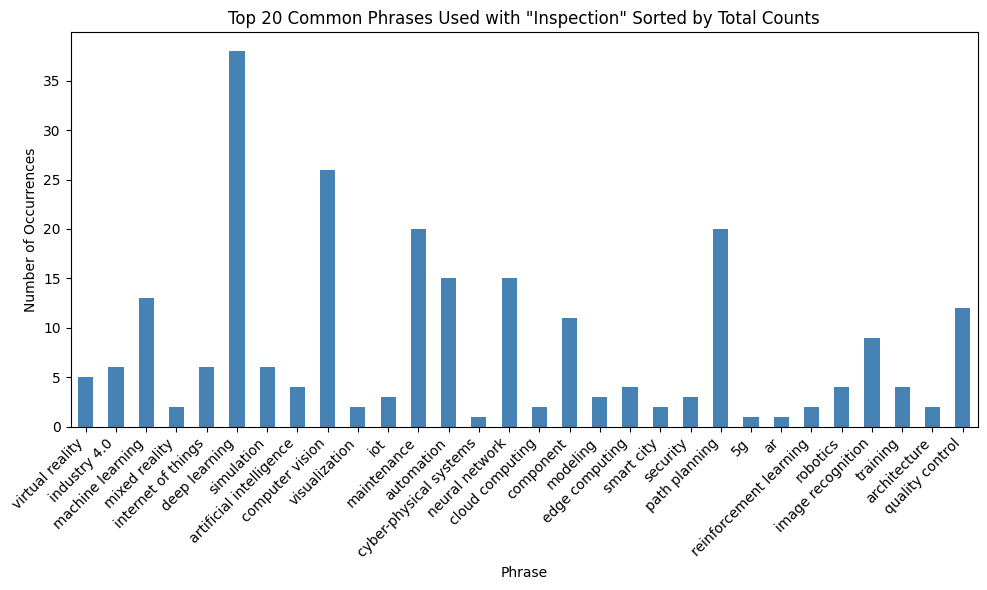

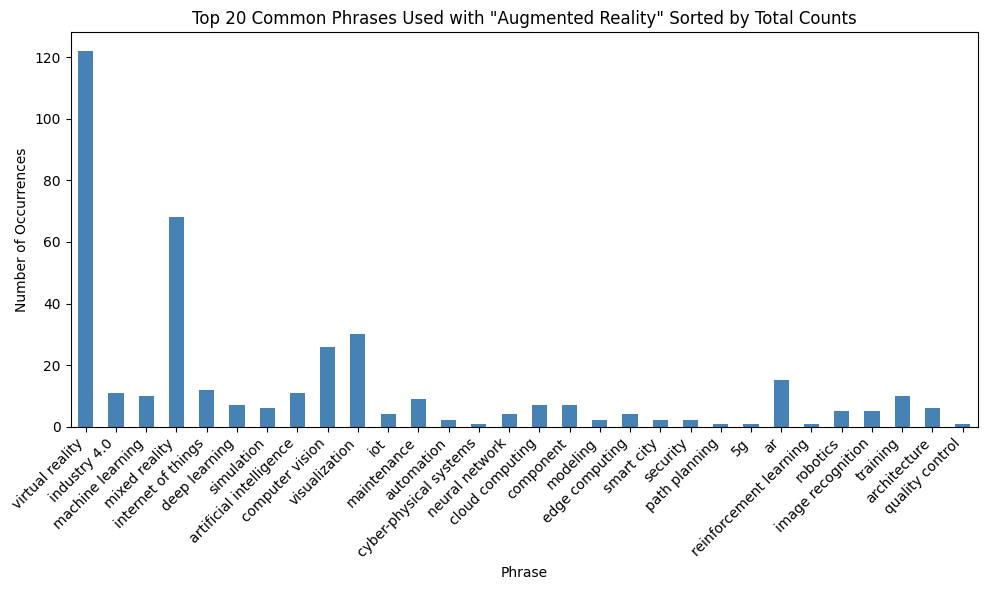

In [142]:

# Find the common phrases among the top phrases in all three cases
common_phrases = set(keyword_counts_dt.index).intersection(set(keyword_counts_inspection.index)).intersection(set(keyword_counts_ar.index))

# Convert the common_phrases to a list
common_phrases = list(common_phrases)

# Create a DataFrame with the counts of the common phrases in each category
common_counts = pd.DataFrame({
    'Digital Twin': keyword_counts_dt[common_phrases],
    'Inspection': keyword_counts_inspection[common_phrases],
    'Augmented Reality': keyword_counts_ar[common_phrases]
}).fillna(0)

# Add a total column
common_counts['Total'] = common_counts.sum(axis=1)

# Sort by total counts
common_counts = common_counts.sort_values('Total', ascending=False)

# Plot the counts for the common phrases in each category
for column in common_counts.columns[:-1]:  # Exclude the total column
    plt.figure(figsize=(10, 6))
    common_counts[column].head(30).plot(kind='bar', color='steelblue')
    plt.title(f'Top 20 Common Phrases Used with "{column}" Sorted by Total Counts')
    plt.xlabel('Phrase')
    plt.ylabel('Number of Occurrences')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'Plots/CommonPhrases/{column}_Common_Phrases.png')
    plt.savefig(fr'..\MSc_HoloLens_Jackal_2391076\Reportfiles\figures\WordSearch\CommonPhrases\{column}_Common_Phrases.png')
plt.show()


<Figure size 1000x600 with 0 Axes>

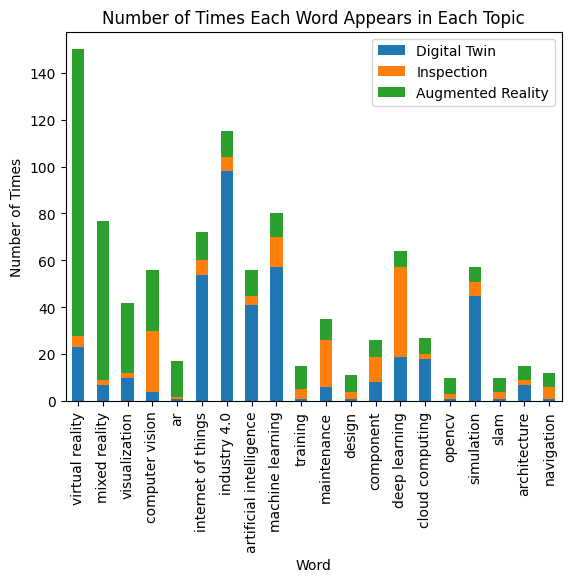

In [143]:
import matplotlib.pyplot as plt

# Create a DataFrame with the counts of each word in each topic
word_counts = pd.DataFrame({
    'Digital Twin': keyword_counts_dt[common_phrases],
    'Inspection': keyword_counts_inspection[common_phrases],
    'Augmented Reality': keyword_counts_ar[common_phrases]
})

# Only show the top 20 words in each topic
word_counts = word_counts.sort_values(by=column, ascending=False).head(20)

# Plot the bar chart
plt.figure(figsize=(10, 6))
word_counts.plot(kind='bar', stacked=True)
plt.title('Number of Times Each Word Appears in Each Topic')
plt.xlabel('Word')
plt.ylabel('Number of Times')
plt.legend()
plt.savefig('Plots/WordCounts.png')
plt.savefig(r'..\MSc_HoloLens_Jackal_2391076\Reportfiles\figures\WordSearch\WordCounts.png')
plt.show()


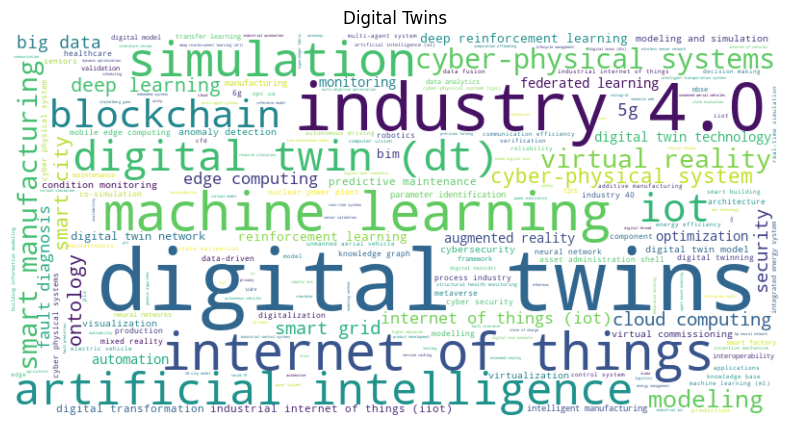

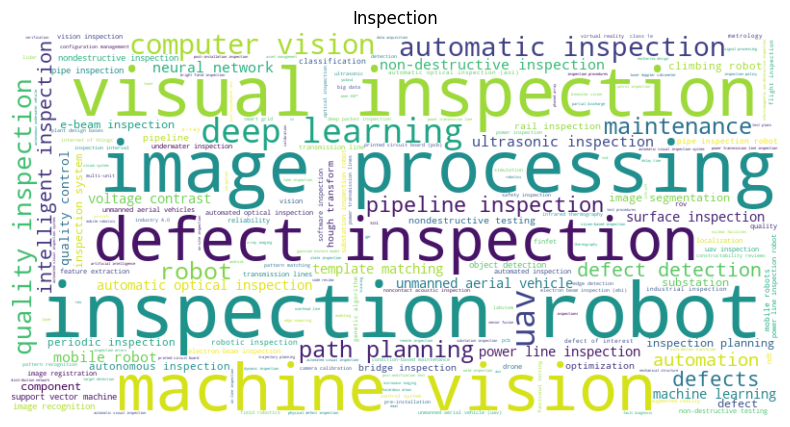

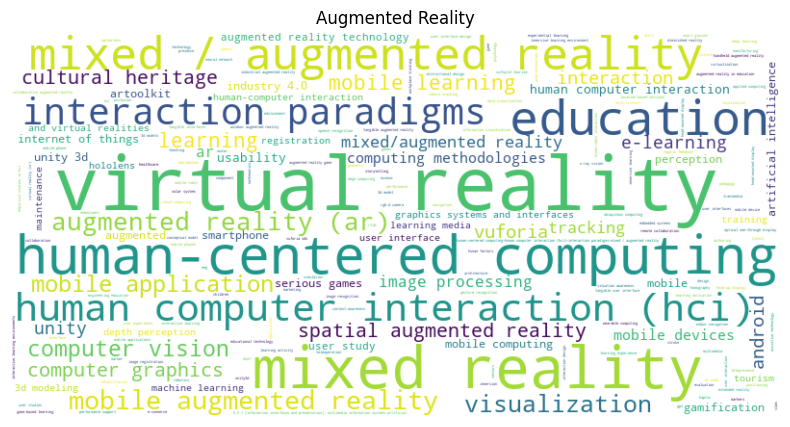

In [144]:
from wordcloud import WordCloud

# Define a function to generate a word cloud
def generate_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate_from_frequencies(data)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.savefig(f'Plots/WordClouds/{title}_wordcloud.png')
    plt.savefig(fr'..\MSc_HoloLens_Jackal_2391076\Reportfiles\figures\WordSearch\WordClouds\{title}_wordcloud.png')
    plt.show()

# Generate word clouds for each topic
generate_wordcloud(keyword_counts_dt, "Digital Twins")
generate_wordcloud(keyword_counts_inspection, "Inspection")
generate_wordcloud(keyword_counts_ar, "Augmented Reality")


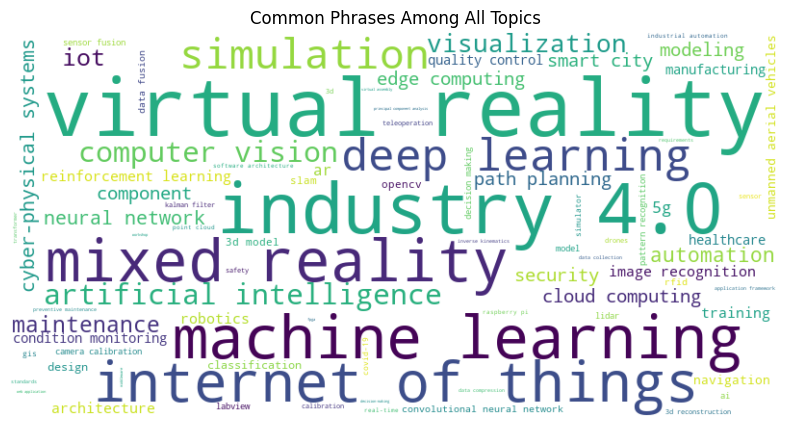

In [145]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

common_counts['Total'] = common_counts.sum(axis=1) # Only if 'Total' column doesn't exist
common_counts_freq = common_counts['Total'].to_dict()

# Define a function to generate a word cloud
def generate_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate_from_frequencies(data)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.savefig(f'Plots/{title}.png')
    plt.savefig(fr'..\MSc_HoloLens_Jackal_2391076\Reportfiles\figures\WordSearch\{title}.png')
    plt.show()

# Assuming 'common_counts' is your DataFrame with phrases as index and their counts as values
common_counts_dict = common_counts.to_dict()

common_counts_freq = {phrase: common_counts_dict['Total'][phrase] for phrase in common_counts.index}

# Generate the word cloud
generate_wordcloud(common_counts_freq, "Common Phrases Among All Topics")


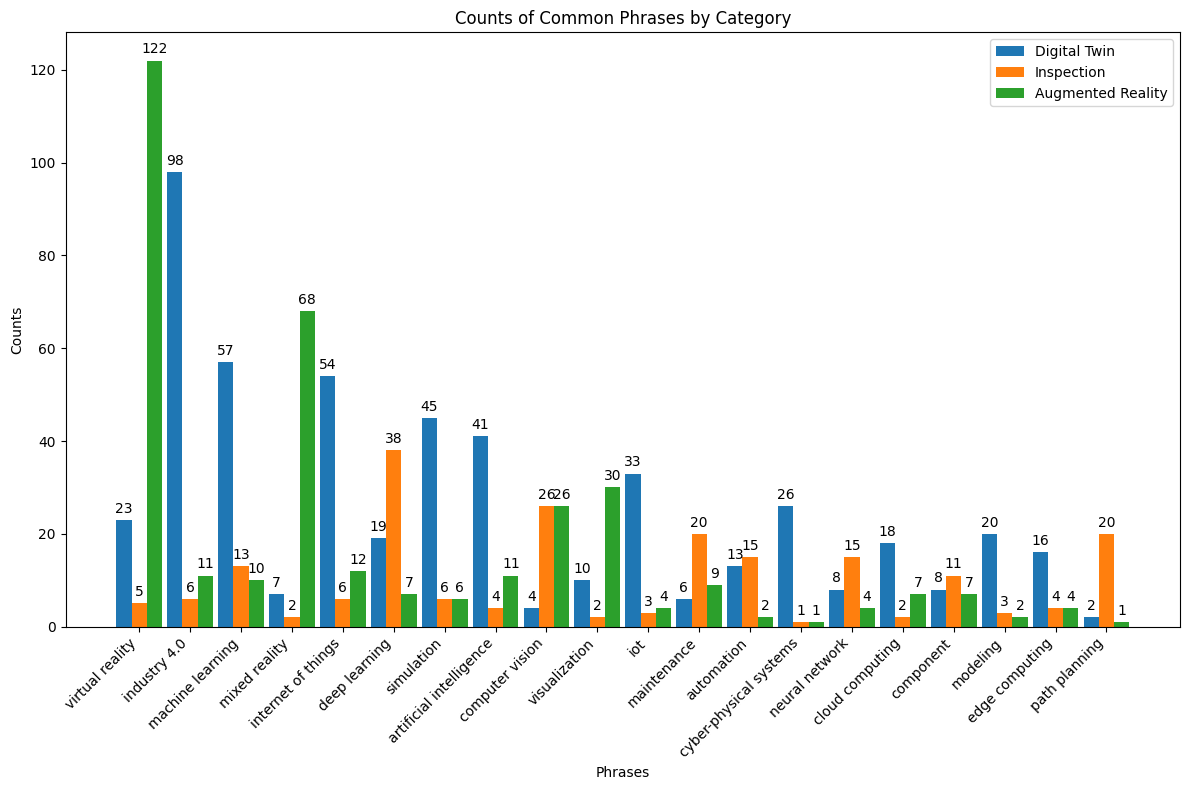

In [146]:
# Compute the x coordinates for the groups
bar_width = 0.3
common_counts = common_counts.sort_values('Total', ascending=False)

common_counts = common_counts.head(20)  # Only show the top 20 phrases
common_counts = common_counts.drop('Total', axis=1)  # Drop the total column
x = np.arange(len(common_counts))

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Generate the bars
rects1 = ax.bar(x - bar_width, common_counts['Digital Twin'], bar_width, label='Digital Twin')
rects2 = ax.bar(x, common_counts['Inspection'], bar_width, label='Inspection')
rects3 = ax.bar(x + bar_width, common_counts['Augmented Reality'], bar_width, label='Augmented Reality')

# Add labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Phrases')
ax.set_ylabel('Counts')
ax.set_title('Counts of Common Phrases by Category')
ax.set_xticks(x)
ax.set_xticklabels(common_counts.index, rotation=45, ha='right')
ax.legend()

# Add labels with the values to the top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Make layout tight
fig.tight_layout()
plt.savefig('Plots/BarChart.png')
plt.savefig(r'..\MSc_HoloLens_Jackal_2391076\Reportfiles\figures\WordSearch\BarChart.png')
plt.show()

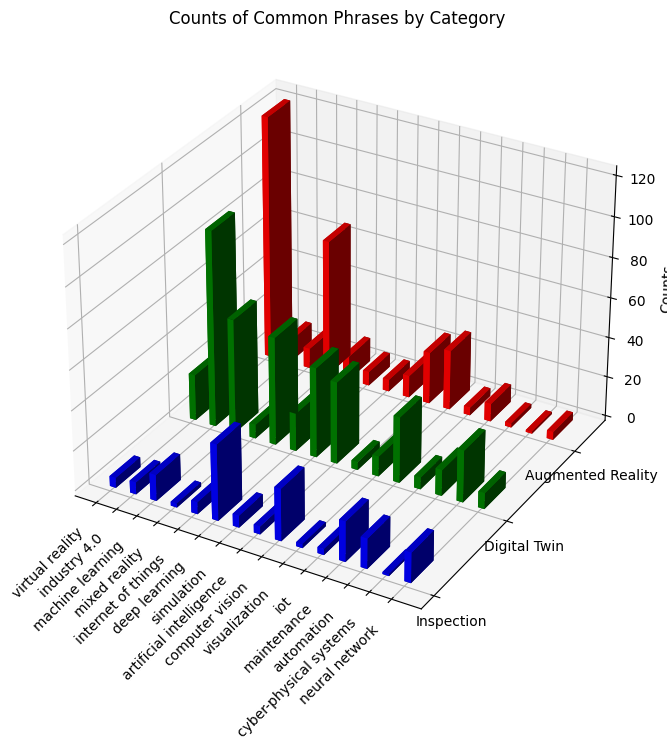

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Reorder the columns
common_counts = common_counts[['Inspection', 'Digital Twin', 'Augmented Reality']]

# Set up the figure and axes
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

common_counts = common_counts.head(15)  # Only show the top 20 phrases
# Convert DataFrame to NumPy array for processing
common_counts_array = common_counts.values

# Generate coordinates for each bar
_x = np.arange(common_counts_array.shape[0])  # number of phrases
_y = np.arange(common_counts_array.shape[1])  # number of categories

# Define width and depth of each bar
width = depth = 0.3

# Define colors for each category
colors = ['blue', 'green', 'red']  # Color for each category

# Draw each set of bars with a separate call to bar3d
for i in range(common_counts_array.shape[1]):  # Loop over categories
    x = _x
    y = np.full(common_counts_array.shape[0], i)  # y-coordinates are the same within each category
    bottom = np.zeros(common_counts_array.shape[0])
    top = common_counts_array[:, i]  # Heights of bars are the counts
    ax.bar3d(x, y, bottom, width, depth, top, color=colors[i], shade=True)

# Labeling
ax.set_zlabel('Counts')
ax.set_title('Counts of Common Phrases by Category')
ax.set_xticks(_x)
ax.set_xticklabels(common_counts.index, rotation=45, ha='right')
ax.set_yticks(_y)
ax.set_yticklabels(common_counts.columns)

plt.savefig('Plots/3DBarChart.png')
plt.savefig(r'..\MSc_HoloLens_Jackal_2391076\Reportfiles\figures\WordSearch\3DBarChart.png')
plt.show()
